## <font color=0099FF>  GIOVANNA ANDRADE SANTOS - 22052563

### Laboratorio de Escalonamento ###

Neste laboratório, iremos simular o funcionamento de algoritmos de escalonamento básicos para entender melhor seu funcionamento.

Na célula abaixo, temos uma classe Processo, que tem as informações de execução, e uma classe de exemplo de escalonamento apenas com os protótipos:

(orientação a objeto em Python)

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import random

class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria aora 
        self.chegada = tempoChegada

    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam

        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S

## <font color=0099FF> FIFO

In [3]:
#FIFO

class FIFO(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que chegam ao tempo zero

    def pronto(self,Processo):
        # implemente aqui o que escalonador faz quando surge um novo processo pronto
        self.prontos.append(Processo)
        
    def proximo(self):
        # implemente aqui a politica de escalonamento para definir um processo a ser executado
        if(len(self.prontos) > 0):
          return self.prontos.pop(0)
        else:
          return None

## <font color=0099FF>SJF

In [4]:


class SJF(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que chegam ao tempo zero

    def pronto(self,Processo):
      self.prontos.append(Processo)
        # implemente aqui o que escalonador faz quando surge um novo processo pronto
        
    def proximo(self):
      p = self.prontos
      if(len(p)):
        t = []
        for i in p:
          t.append(i.tam)
          x = min(t)
        return p.pop(t.index(x))
      else:
        return None

## <font color=0099FF>STCF

In [5]:
#STCF

class STCF(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que chegam ao tempo zero

    def pronto(self,Processo):
      self.prontos.append(Processo)
        # implemente aqui o que escalonador faz quando surge um novo processo pronto
        
    def proximo(self):
      p = self.prontos
      if(len(p)):
        t = []
        for i in p:
          t.append(i.tam)
          x = min(t)
        return p.pop(t.index(x))
      else:
        return None

##<font color=0099FF> RoundRobin

In [6]:
class RoundRobin(object): # Protótipo de escalonador de exemplo
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que chegam ao tempo zero

    def pronto(self,Processo):
      self.prontos.append(Processo)
      # implemente aqui o que escalonador faz quando surge um novo processo pronto
        
    def proximo(self):
        if(len(self.prontos) > 0):
          return self.prontos.pop(0)
        else:
          return None

Na célula abaixo, são criados quatro processos completamente CPU-Bound que precisam de 3 timeslices para rodar.

O valor de E/S é um número entre 0 e 100 indicando quantos porcento de chance o processo tem de fazer E/S durante seu tempo na CPU

In [7]:
nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0]  #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([10,20,30,40])
temposChegada = [0,0,0,0]

total = tamanho.sum()
procs = []
naoProntos = []
menor = min(temposChegada)
for i in range(nprocs):
  if(temposChegada[i] == menor):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,temposChegada[i])) #cria uma lista procs de Processos
  else:
    naoProntos.append(Processo(nomes[i],chanceio[i],tamanho[i],0,temposChegada[i]))


Na célula abaixo, temos uma simulação do funcionamento de um escalonador de processos. As duas configurações importantes aqui são o valor do quantum padrão (que pode ser dinamico em algoritmos mais complexos, e quantos timeslices um processo que faz e/s passa bloqueado.

Percebam que na terceira linha é instanciado o escalonador (neste caso, um round_robin). Isto foi feito assim para ser simples trocar o escalonador e repetir a simulação, bastando criar uma classe com os métodos pronto, proximo e construtor e alterar esta linha.

##<font color=0099FF> Simulador FIFO/SJF

In [ ]:
#SJF/FIFO
quantum = 2
tempoBloq = 1

escalonador =  SJF(procs) #troque escalonador pelo seu escalonador
bloqueados = []

tempo = 0
random.seed(0)
tempoRes = 0
tempoExec = 0

while total>0:
    for proc in naoProntos:
      if proc.chegada <= tempo:
        x = naoProntos.pop(naoProntos.index(proc))
        escalonador.pronto(x)
    p = escalonador.proximo()
    
    if(p is not None):
        rodou, _ = p.roda() #adicione quantum como parâmetro, por enquanto nao temos E/S
        if(tamanho[nomes.index(p.nome)] - rodou == p.tam):
          tempoRes += tempo - p.chegada
        tempo+=rodou
        total-=rodou
        if(p.tam>0):
          escalonador.pronto(p)
        else:
          tempoExec += tempo - p.chegada
               
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1

r = tempoRes/nprocs
e = tempoExec/nprocs
    

print(f'Tempo de execução: {e} \nTempo de resposta: {r}\nTempo de espera: {r}')

A  rodou por  10  timeslice, faltam  0
B  rodou por  20  timeslice, faltam  0
C  rodou por  30  timeslice, faltam  0
D  rodou por  40  timeslice, faltam  0
Tempo de execução: 50.0 
Tempo de resposta: 25.0
Tempo de espera: 25.0


##<font color=0099FF> Simulador STCF/RoundRobin

In [ ]:
#STCF/RoundRobin

quantum = 2
tempoBloq = 1

escalonador =  RoundRobin(procs) #troque escalonador pelo seu escalonador
bloqueados = []

tempo = 0
random.seed(0)
tempoRes = 0
tempoExec = 0
tempoEspera = 0

while total>0:
    for proc in naoProntos:
      if proc.chegada <= tempo:
        x = naoProntos.pop(naoProntos.index(proc))
        escalonador.pronto(x)
    p = escalonador.proximo()
    
    if(p is not None):
        rodou, _ = p.roda(quantum) #adicione quantum como parâmetro, por enquanto nao temos E/S
        if(tamanho[nomes.index(p.nome)] - rodou == p.tam):
          tempoRes += tempo - p.chegada
        tempo+=rodou
        total-=rodou
        if(p.tam>0):
          escalonador.pronto(p)
        else:
          tempoExec += tempo - p.chegada
               
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1

r = tempoRes/nprocs
e = tempoExec/nprocs
    

print(f'Tempo de execução: {e} \nTempo de resposta: {r}')

A  rodou por  2  timeslice, faltam  8
B  rodou por  2  timeslice, faltam  18
C  rodou por  2  timeslice, faltam  28
D  rodou por  2  timeslice, faltam  38
A  rodou por  2  timeslice, faltam  6
B  rodou por  2  timeslice, faltam  16
C  rodou por  2  timeslice, faltam  26
D  rodou por  2  timeslice, faltam  36
A  rodou por  2  timeslice, faltam  4
B  rodou por  2  timeslice, faltam  14
C  rodou por  2  timeslice, faltam  24
D  rodou por  2  timeslice, faltam  34
A  rodou por  2  timeslice, faltam  2
B  rodou por  2  timeslice, faltam  12
C  rodou por  2  timeslice, faltam  22
D  rodou por  2  timeslice, faltam  32
A  rodou por  2  timeslice, faltam  0
B  rodou por  2  timeslice, faltam  10
C  rodou por  2  timeslice, faltam  20
D  rodou por  2  timeslice, faltam  30
B  rodou por  2  timeslice, faltam  8
C  rodou por  2  timeslice, faltam  18
D  rodou por  2  timeslice, faltam  28
B  rodou por  2  timeslice, faltam  6
C  rodou por  2  timeslice, faltam  16
D  rodou por  2  timeslice, falt

### Laboratório: ###


1 - Altere o simulador acima para calcular o tempo de execucao medio e tempo de resposta 

2 - Implemente o escalonador por FIFO e SJF e verifique seus tempos de execução e espera.

3 - Faça em outra célula uma implementação do STCF e Round Robin, alterando o p.roda() para receber o quantum


##<font color=0099FF> Gráfico 1

In [ ]:
tam_medios = []
temposResp = []
c = 0
for i in range (10):
  
  nprocs = 4
  nomes = ['A','B','C','D']
  chanceio = [0,0,0,0]  #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
  tamanho = np.array([10+c,20+c,30+c,40+c])
  temposChegada = [0,0,0,0]
  tam_medio = tamanho.sum()/nprocs

  total = tamanho.sum()
  procs = []
  naoProntos = []
  menor = min(temposChegada)
  for i in range(nprocs):
    if(temposChegada[i] == menor):
      procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,temposChegada[i])) #cria uma lista procs de Processos
    else:
      naoProntos.append(Processo(nomes[i],chanceio[i],tamanho[i],0,temposChegada[i]))



      #SJF/FIFO
  quantum = 2
  tempoBloq = 1

  escalonador =  SJF(procs) #troque escalonador pelo seu escalonador
  bloqueados = []

  tempo = 0
  random.seed(0)
  tempoRes = 0
  tempoExec = 0

  while total>0:
      for proc in naoProntos:
        if proc.chegada <= tempo:
          x = naoProntos.pop(naoProntos.index(proc))
          escalonador.pronto(x)
      p = escalonador.proximo()
      
      if(p is not None):
          rodou, _ = p.roda() #adicione quantum como parâmetro, por enquanto nao temos E/S
          if(tamanho[nomes.index(p.nome)] - rodou == p.tam):
            tempoRes += tempo - p.chegada
          tempo+=rodou
          total-=rodou
          if(p.tam>0):
            escalonador.pronto(p)
          else:
            tempoExec += tempo - p.chegada
                
      else:
          #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
          tempo+=1

  r = tempoRes/nprocs
  e = tempoExec/nprocs
      

  print(f'Tempo de execução: {e} \nTempo de resposta: {r}')
  temposResp.append(r)
  tam_medios.append(tam_medio)
  c+=5


In [ ]:
temposResp

[25.0, 32.5, 40.0, 47.5, 55.0, 62.5, 70.0, 77.5, 85.0, 92.5]

In [ ]:
tam_medios

[25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0]

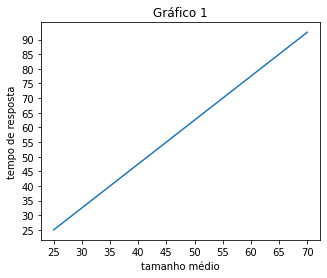

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(tam_medios,temposResp)
plt.yticks(list(range(25, 95, 5)))
plt.ylabel('tempo de resposta') 
plt.xticks(list(range(25, 75, 5)))
plt.xlabel('tamanho médio') 
plt.title('Gráfico 1') 
plt.show() 

##<font color=0099FF> Gráfico 2

In [ ]:
temposResp = []
quantums = []
c = 0

for i in range(20):
  nprocs = 4
  nomes = ['A','B','C','D']
  chanceio = [0,0,0,0]  #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
  tamanho = np.array([10,20,30,40])
  temposChegada = [0,0,0,0]

  total = tamanho.sum()
  procs = []
  naoProntos = []
  menor = min(temposChegada)
  for i in range(nprocs):
    if(temposChegada[i] == menor):
      procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,temposChegada[i])) #cria uma lista procs de Processos
    else:
      naoProntos.append(Processo(nomes[i],chanceio[i],tamanho[i],0,temposChegada[i]))

  #STCF/RoundRobin

  quantum = 2+c
  tempoBloq = 1

  escalonador =  RoundRobin(procs) #troque escalonador pelo seu escalonador
  bloqueados = []

  tempo = 0
  random.seed(0)
  tempoRes = 0
  tempoExec = 0
  tempoEspera = 0

  while total>0:
      for proc in naoProntos:
        if proc.chegada <= tempo:
          x = naoProntos.pop(naoProntos.index(proc))
          escalonador.pronto(x)
      p = escalonador.proximo()
      
      if(p is not None):
          rodou, _ = p.roda(quantum) #adicione quantum como parâmetro, por enquanto nao temos E/S
          if(tamanho[nomes.index(p.nome)] - rodou == p.tam):
            tempoRes += tempo - p.chegada
          tempo+=rodou
          total-=rodou
          if(p.tam>0):
            escalonador.pronto(p)
          else:
            tempoExec += tempo - p.chegada
                
      else:
          #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
          tempo+=1

  r = tempoRes/nprocs
  e = tempoExec/nprocs
      

  print(f'Tempo de execução: {e} \nTempo de resposta: {r}')
  temposResp.append(r)
  quantums.append(quantum)
  c+=10

A  rodou por  2  timeslice, faltam  8
B  rodou por  2  timeslice, faltam  18
C  rodou por  2  timeslice, faltam  28
D  rodou por  2  timeslice, faltam  38
A  rodou por  2  timeslice, faltam  6
B  rodou por  2  timeslice, faltam  16
C  rodou por  2  timeslice, faltam  26
D  rodou por  2  timeslice, faltam  36
A  rodou por  2  timeslice, faltam  4
B  rodou por  2  timeslice, faltam  14
C  rodou por  2  timeslice, faltam  24
D  rodou por  2  timeslice, faltam  34
A  rodou por  2  timeslice, faltam  2
B  rodou por  2  timeslice, faltam  12
C  rodou por  2  timeslice, faltam  22
D  rodou por  2  timeslice, faltam  32
A  rodou por  2  timeslice, faltam  0
B  rodou por  2  timeslice, faltam  10
C  rodou por  2  timeslice, faltam  20
D  rodou por  2  timeslice, faltam  30
B  rodou por  2  timeslice, faltam  8
C  rodou por  2  timeslice, faltam  18
D  rodou por  2  timeslice, faltam  28
B  rodou por  2  timeslice, faltam  6
C  rodou por  2  timeslice, faltam  16
D  rodou por  2  timeslice, falt

In [ ]:
temposResp


[3.0,
 16.5,
 23.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0]

In [ ]:
quantums

[2,
 12,
 22,
 32,
 42,
 52,
 62,
 72,
 82,
 92,
 102,
 112,
 122,
 132,
 142,
 152,
 162,
 172,
 182,
 192]

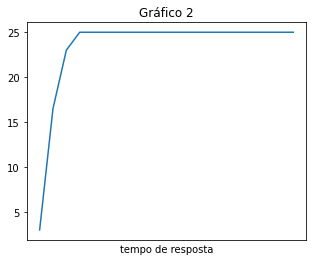

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(quantums,temposResp)
plt.xticks(list(range(25, 190, 5)))
plt.xlabel('quantum') 
plt.xticks(list(range(25, 25, 5)))
plt.xlabel('tempo de resposta') 
plt.title('Gráfico 2') 
plt.show() 